In [1]:
import galsim
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

import numpy as np
from SpecklePSF import SpeckleSeries
import pickle
import pandas as pd

scratchdir = '/global/cscratch1/sd/chebert/'
saveDir = './../Fits/hsmFits/'

# find all image files in the scratch directory
fileNames = ! ls /global/cscratch1/sd/chebert/rawSpeckles/ | grep 'img' 
fileNames = [f for f in fileNames if f not in ['img_a_004.fits', 'img_b_004.fits', # frames with no signal 
                                               'img_a_388.fits', 'img_b_388.fits', # frames with no signal 
                                               'img_a_389.fits', 'img_b_389.fits', # frames with no signal 
                                               'img_a_381.fits', 'img_b_381.fits', # frames with no signal 
                                               'img_a_207.fits', 'img_b_207.fits', # frames with no signal 
                                               # b frame: PSF moves suddenly by 60 pixels after 200 frames 
                                               'img_a_218.fits', 'img_b_218.fits', 
                                               'img_a_234.fits', 'img_b_234.fits']] # frames with smudges
NFiles = len(fileNames)

import helperFunctions as helper
from astropy.io import fits

In [2]:
with open('./../Fits/centerOfMassB.p', 'rb') as file:
    comDictB = pickle.load(file)
with open('./../Fits/fwhmB.p', 'rb') as file:
    fwhmDictB = pickle.load(file)

with open('./../Fits/centerOfMassA.p', 'rb') as file:
    comDictA = pickle.load(file)
with open('./../Fits/fwhmA.p', 'rb') as file:
    fwhmDictA = pickle.load(file)
    
with open('./eConversionWithGain.p', 'rb') as file:
    convWithGain = pickle.load(file)
    convWithGain = dict(convWithGain)
    
# with open('./pixelMasks.p', 'rb') as file:
#     pixelMasks = pickle.load(file)
#     pixelMasks = dict(pixelMasks)

## Testing/finding cosmic rays

In [3]:
maskDict = {}

### b 019

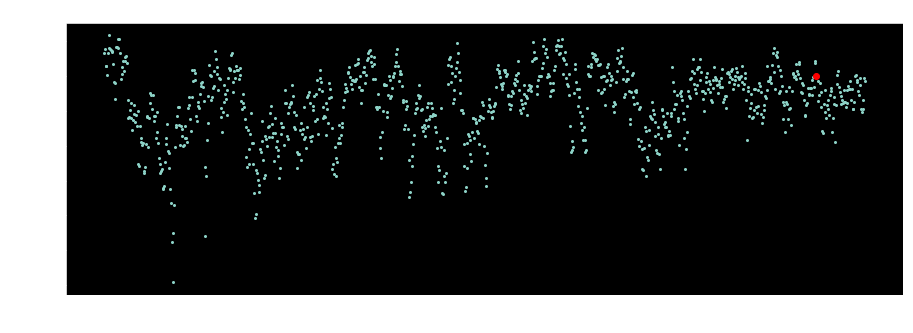

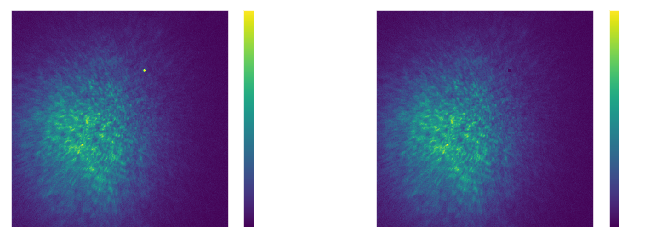

In [4]:
cosmicrayid = 935
file = 'img_b_019.fits'
hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
series = hdu[0].data.astype(np.float32)
hdu.close()
helper.subtractBackground(series, method='slice')

# rayidx = np.unravel_index([y*256+x for y in [71, 72, 73] for x in [155, 156, 157]], (256, 256))
xs, ys = np.where(series[cosmicrayid][60:90,150:180]>200) + np.array([[60],[150]])

mask = np.ones((256,256))
for rayidx in zip(xs,ys):
    mask[rayidx] = 0
vmax = np.max(series[cosmicrayid] * mask)

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
plt.plot(cosmicrayid,series.sum(axis=1).sum(axis=1)[cosmicrayid] / convWithGain[file], 'ro')
plt.ylabel('image flux [photons]')
plt.xlabel('exposure index')
plt.title(file)
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(series[cosmicrayid], vmax=vmax)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(series[cosmicrayid] * mask, vmax=vmax)
# plt.imshow(mask)
plt.colorbar();
plt.xticks([])
plt.yticks([])
plt.savefig('../Plots/exampleCR2.png');

maskDict[file] = {cosmicrayid: mask}

### b 022

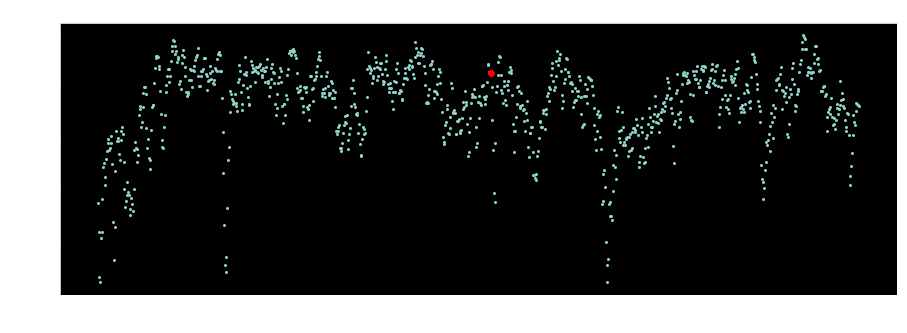

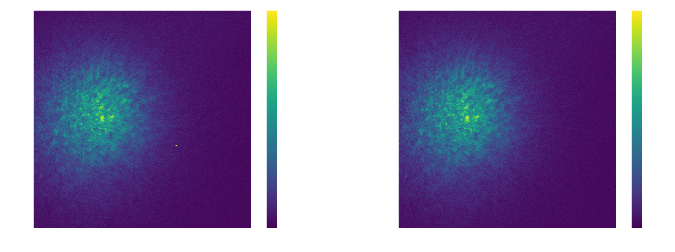

In [5]:
cosmicrayid = 516
file = 'img_b_022.fits'
hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
series = hdu[0].data.astype(np.float32)
hdu.close()
helper.subtractBackground(series, method='slice')

xs, ys = np.where(series[cosmicrayid][150:180,160:180]>80) + np.array([[150],[160]])

mask = np.ones((256,256))
for rayidx in zip(xs,ys):
    mask[rayidx] = 0
vmax = np.max(series[cosmicrayid] * mask)

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
plt.plot(cosmicrayid,series.sum(axis=1).sum(axis=1)[cosmicrayid] / convWithGain[file], 'ro')
plt.ylabel('image flux [photons]')
plt.xlabel('exposure index')
plt.title(file)
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(series[cosmicrayid], vmax=vmax)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(series[cosmicrayid] * mask, vmax=vmax)
# plt.imshow(mask)
plt.colorbar();

maskDict[file] = {cosmicrayid: mask}

### b 75

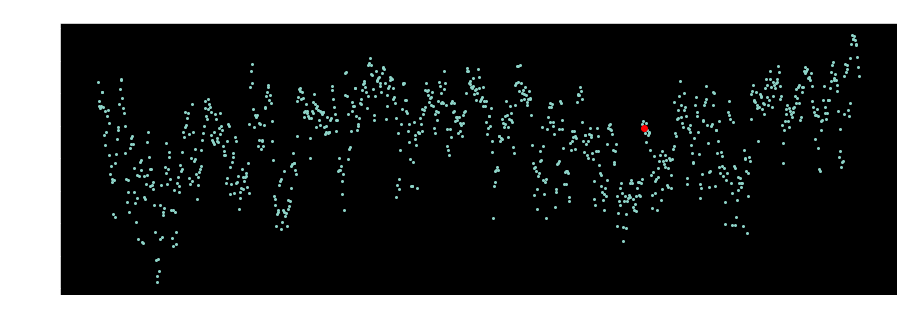

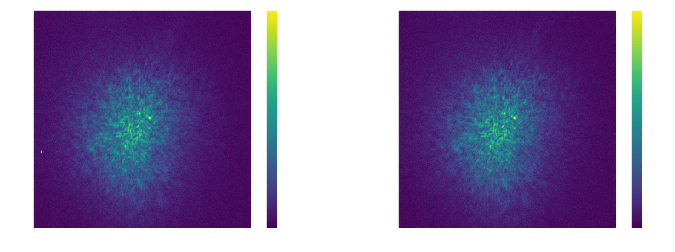

In [6]:
cosmicrayid = 717
file = 'img_b_075.fits'
hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
series = hdu[0].data.astype(np.float32)
hdu.close()
helper.subtractBackground(series, method='slice')

# rayidx = np.unravel_index(np.argmax(series[cosmicrayid]), (256,256))
# rayidx = np.unravel_index([y*256+x for y in [167,166] for x in [9]], (256, 256))
xs, ys = np.where(series[cosmicrayid][150:180,0:20]>50) + np.array([[150],[0]])

mask = np.ones((256,256))
for rayidx in zip(xs,ys):
    mask[rayidx] = 0
vmax = np.max(series[cosmicrayid] * mask)

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
plt.plot(cosmicrayid, series.sum(axis=1).sum(axis=1)[cosmicrayid] / convWithGain[file], 'ro')
plt.ylabel('image flux [photons]')
plt.xlabel('exposure index')
plt.title(file)
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(series[cosmicrayid], vmax=vmax)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(series[cosmicrayid] * mask, vmax=vmax)
# plt.imshow(mask)
plt.colorbar();

maskDict[file] = {cosmicrayid: mask}

### b 103

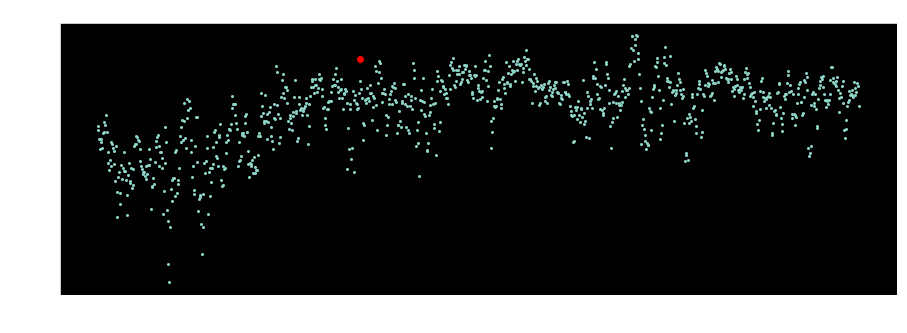

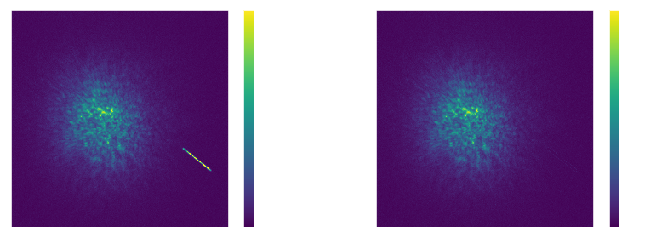

In [7]:
cosmicrayid = 344
file = 'img_b_103.fits'
hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
series = hdu[0].data.astype(np.float32)
hdu.close()
helper.subtractBackground(series, method='slice')

# oldxs = [163,164,164,165,165,166,167,167,168,169,169,170,170,171,172,172,173,174,174,175,175,176,
#       176,177,178,178,179,179,180,181,182,182,183,183,184,184,185,186,186,186,187,187,188,188,
#       189,189,180,185,188,171,166,185,168,184,187,177,181,169,183,173,173,170,181,189,168,177,
#       183,172,166,186,188,165,163, 164, 167, 167, 171, 171, 174, 175, 176, 178, 182, 182, 184, 187,
#       163, 164, 166, 168, 170, 172, 173, 174, 176, 179, 180, 180, 181, 185, 185, 190,
#       165, 165, 168, 169, 172, 173, 175, 184, 188, 189,
#       162, 164, 166, 166, 167, 167, 169, 169, 170, 171, 171, 171, 175, 179, 182, 185, 186, 190,
#       163, 168, 168, 170, 177, 177, 181, 182, 183, 184, 186, 188]
# oldys = [202,202,203,204,205,205,206,207,208,209,210,210,211,212,212,213,214,215,216,217,216,217,
#       218,219,220,221,221,222,223,224,225,226,226,227,227,228,229,230,231,232,231,232,233,231,
#       234,235,222,230,232,211,206,228,207,229,230,220,225,208,228,213,215,209,223,233,209,218,
#       225,214,204,229,234,203, 203, 204, 205, 208, 210, 213, 214, 215, 219, 219, 224, 227, 226, 233,
#       201, 201, 207, 206, 212, 211, 212, 217, 216, 220, 221, 224, 226, 227, 231, 234,
#       202, 206, 210, 207, 215, 216, 218, 230, 230, 232,
#       202, 205, 203, 208, 204, 209, 198, 211, 208, 199, 209, 214, 214, 223, 228, 232, 233, 235,
#       204, 205, 211, 198, 217, 221, 222, 223, 229, 225, 228, 235]
xs, ys = np.where(series[cosmicrayid][160:,195:]>40) + np.array([[160],[195]])

mask = np.ones((256,256))
for rayidx in zip(xs,ys):
    mask[rayidx] = 0
vmax = np.max(series[cosmicrayid] * mask)

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
plt.plot(cosmicrayid,series.sum(axis=1).sum(axis=1)[cosmicrayid] / convWithGain[file], 'ro')
plt.ylabel('image flux [photons]')
plt.xlabel('exposure index')
plt.title(file)
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(series[cosmicrayid], vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(series[cosmicrayid] * mask)
plt.xticks([])
plt.yticks([])
plt.savefig('../Plots/exampleCR1.png');
plt.colorbar();

maskDict[file] = {cosmicrayid: mask}

### b 311

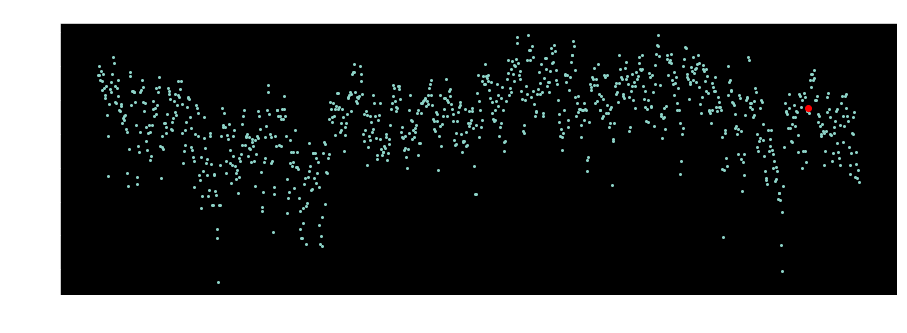

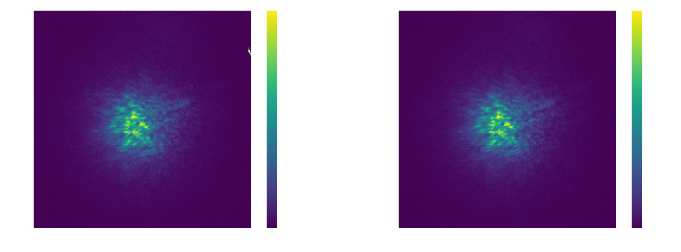

In [8]:
cosmicrayid = 933
file = 'img_b_311.fits'
hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
series = hdu[0].data.astype(np.float32)
hdu.close()
helper.subtractBackground(series, method='slice')

xs, ys = np.where(series[cosmicrayid][:,220:]>50) + np.array([[0],[220]])
# print(xs,ys)
mask = np.ones((256,256))
for rayidx in zip(xs,ys):
    mask[rayidx] = 0
vmax = np.max(series[cosmicrayid] * mask)

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
plt.plot(cosmicrayid,series.sum(axis=1).sum(axis=1)[cosmicrayid] / convWithGain[file], 'ro')
plt.ylabel('image flux [photons]')
plt.xlabel('exposure index')
plt.title(file)
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(series[cosmicrayid], vmax=vmax)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(series[cosmicrayid]*mask)
plt.colorbar();

maskDict[file] = {cosmicrayid: mask}

In [9]:
maskDict['img_b_019.fits'][935].dtype

dtype('float64')

### Save dict

In [10]:
with open('./pixelMasks.p', 'wb') as file:
    pickle.dump(maskDict, file)

## Testing for weird exposure: blank, off the frame, etc

### a 234 -- smudges

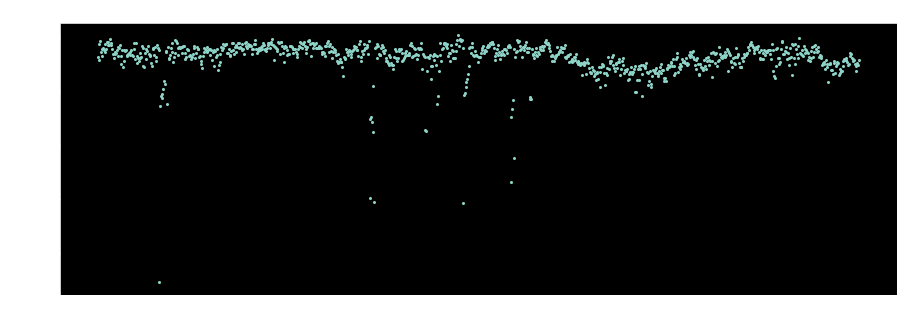

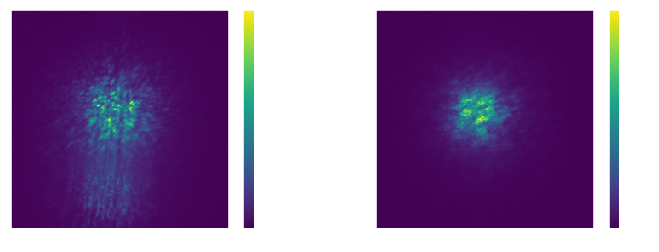

In [5]:
file = 'img_a_234.fits'
hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
series = hdu[0].data.astype('float64')
hdu.close()
helper.subtractBackground(series, method='mask',center='old')

minid, maxid = np.argmin(series.sum(axis=1).sum(axis=1)), np.argmax(series.sum(axis=1).sum(axis=1))
vmax = np.max(series[maxid])

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
plt.ylabel('image flux [photons]')
plt.xlabel('exposure index')
plt.title(file)
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(series[minid])
plt.xticks([])
plt.yticks([])
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(series[maxid], vmax=vmax)
plt.colorbar()

plt.savefig('../Plots/exampleSmdugePSF.png');

### a 207 -- one of the lowest flux datasets I have

In [295]:
# file = 'img_a_207.fits'
# hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
# series = hdu[0].data.astype('float64')
# hdu.close()
# helper.subtractBackground(series, method='slice')

# minid, maxid = np.argmin(series[50:170].sum(axis=1).sum(axis=1)), np.argmax(series[50:170].sum(axis=1)[:500].sum(axis=1))
# vmax = np.max(series[50:170][maxid])

# criteria = np.max([comDictB['img_b_207.fits'] + fwhmDictB['img_b_207.fits'], comDictA[file] + fwhmDictA[file]])
# print(criteria)

# plt.figure(figsize=(15,5))
# plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
# plt.plot(np.linspace(50+minid,50+minid+10,10),series[50+minid:50+minid+10].sum(axis=1).sum(axis=1) / convWithGain[file],'ro',ms=2)
# plt.ylabel('image flux [photons]')
# plt.xlabel('exposure index')
# plt.title(file)
# plt.show()

# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plt.imshow(series[50:170][minid])
# plt.colorbar()

# plt.subplot(1,2,2)
# plt.imshow(series[50:170][maxid], vmax=vmax)
# plt.colorbar();

In [296]:
# series.sum(axis=1).sum(axis=1).mean()/ convWithGain[file]

### a 371 -- resolved (thought it might have issues but it looks fine)

In [263]:
# file = 'img_a_371.fits'
# hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
# series = hdu[0].data.astype('float64')
# hdu.close()
# helper.subtractBackground(series, method='slice')

# minid, maxid = np.argmin(series.sum(axis=1).sum(axis=1)), np.argmax(series.sum(axis=1).sum(axis=1))
# vmax = np.max(series[maxid])

# plt.figure(figsize=(15,5))
# plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
# plt.ylabel('image flux [photons]')
# plt.xlabel('exposure index')
# plt.title(file)
# plt.show()

# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plt.imshow(series[minid], vmax=vmax)
# plt.colorbar()

# plt.subplot(1,2,2)
# plt.imshow(series[maxid], vmax=vmax)
# plt.colorbar();

### b 042 -- resolved (off the frame PSF but it's rejected so all good)

In [276]:
# hdu = fits.open(scratchdir + 'rawSpeckles/' + 'img_b_042.fits')
# series = hdu[0].data.astype('float64')
# hdu.close()
# helper.subtractBackground(series, method='slice')
# criteria = np.max([comDictB['img_b_042.fits'] + fwhmDictB['img_b_042.fits'], 
#                     comDictA['img_a_042.fits'] + fwhmDictA['img_a_042.fits']])
# minid, maxid = np.argmin(series.sum(axis=1).sum(axis=1)), np.argmax(series.sum(axis=1).sum(axis=1))
# vmax = np.max(series[maxid])

# print(criteria)

# plt.figure(figsize=(15,5))
# plt.plot(np.linspace(0,999,1000),series.sum(axis=1).sum(axis=1) / convWithGain[file],'o',ms=2)
# plt.ylabel('image flux [photons]')
# plt.xlabel('exposure index')
# plt.title(file)
# plt.show()

# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plt.imshow(series[minid])#, vmax=vmax)
# plt.colorbar()

# plt.subplot(1,2,2)
# plt.imshow(series[maxid], vmax=vmax)
# plt.colorbar();